<a href="https://colab.research.google.com/github/Chaotic-Legend/CMP-438-Codes/blob/main/Lab%20%238%3A%20ObstacleAvoidance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* **TPUs and GPUs accelerate machine-learning workloads** by performing large numbers of mathematical operations in parallel, making training and inference significantly faster than on a CPU.
* **Supervised learning relies on labeled datasets**, meaning that each training example must include both the input data and the correct output for the model to learn the relationship between them.

CMP 438: Communicating Robots - Isaac D. Hoyos

In [ ]:
# Import libraries for numerical operations, data handling, and visualization.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import scikit-learn modules for data splitting, modeling, and evaluation.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Generate synthetic data to simulate simple robot navigation rules.

"""
If the front distance is very small, the robot turns left or right;
if the left side is more blocked it turns right;
if the right side is more blocked it turns left;
otherwise it goes forward.
"""

# Generate synthetic distance data for robot navigation decisions.
np.random.seed(42)
n_samples = 1000

# Distances are random values between 0.0 and 1.0.
dist_left = np.random.rand(n_samples)
dist_front = np.random.rand(n_samples)
dist_right = np.random.rand(n_samples)
actions = []

# Assign actions based on simple navigation rules.
for left, front, right in zip(dist_left, dist_front, dist_right):
    if front < 0.2:
        action = "turn_left" if left > right else "turn_right"
    else:
        if left < 0.2 and right > 0.3:
            action = "turn_right"
        elif right < 0.2 and left > 0.3:
            action = "turn_left"
        else:
            action = "go_forward"
    actions.append(action)

# Create a DataFrame holding distances and the chosen action.
data = pd.DataFrame({
    "dist_left": dist_left,
    "dist_front": dist_front,
    "dist_right": dist_right,
    "actions": actions})

# Print a title and display the first rows of the DataFrame.
print("=== Synthetic Robot Navigation Data ===")
data.head()

=== Synthetic Robot Navigation Data ===


,dist_left,dist_front,dist_right,actions
0,0.374540,0.185133,0.261706,turn_left
1,0.950714,0.541901,0.246979,go_forward
2,0.731994,0.872946,0.906255,go_forward
3,0.598658,0.732225,0.249546,go_forward
4,0.156019,0.806561,0.271950,go_forward


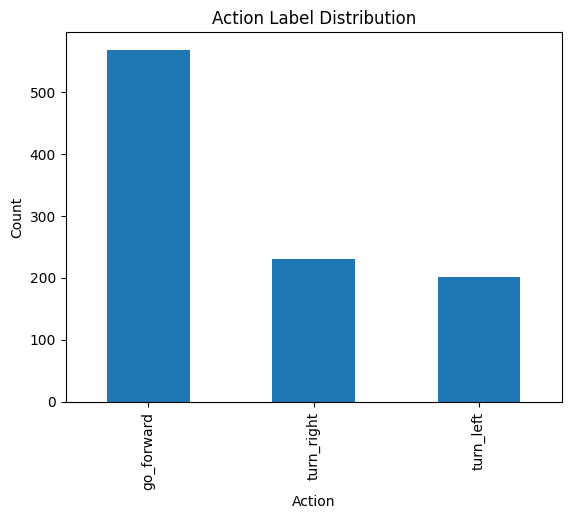

In [ ]:
# Plot a bar chart showing how many times each action appears in the dataset.
data['actions'].value_counts().plot(kind='bar')

# Add labels and a title to the chart.
plt.title('Action Label Distribution')
plt.xlabel('Action')
plt.ylabel('Count')

# Display the plot.
plt.show()

In [ ]:
# Separate the features (distances) from the target action labels.
x = data[["dist_left", "dist_front", "dist_right"]]
y = data["actions"]

# Split the dataset into training and testing sets with stratified sampling.
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42, stratify=y)

# Display the shapes of the training and testing sets.
x_train.shape, x_test.shape

((750, 3), (250, 3))

In [ ]:
# Create a decision tree classifier with a maximum depth of 4.
clf = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the classifier using the training data.
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
# Predict the actions for the test set using the trained classifier.
y_pred = clf.predict(x_test)

# Print the accuracy of the model on the test data.
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Print the confusion matrix to show correct and incorrect predictions.
print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

# Print a detailed classification report with precision, recall, and F1-score.
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

Accuracy: 0.9480

=== Confusion Matrix ===
[[142   0   0]
 [  1  46   3]
 [  1   8  49]]

=== Classification Report ===
              precision    recall  f1-score   support

  go_forward       0.99      1.00      0.99       142
   turn_left       0.85      0.92      0.88        50
  turn_right       0.94      0.84      0.89        58

    accuracy                           0.95       250
   macro avg       0.93      0.92      0.92       250
weighted avg       0.95      0.95      0.95       250



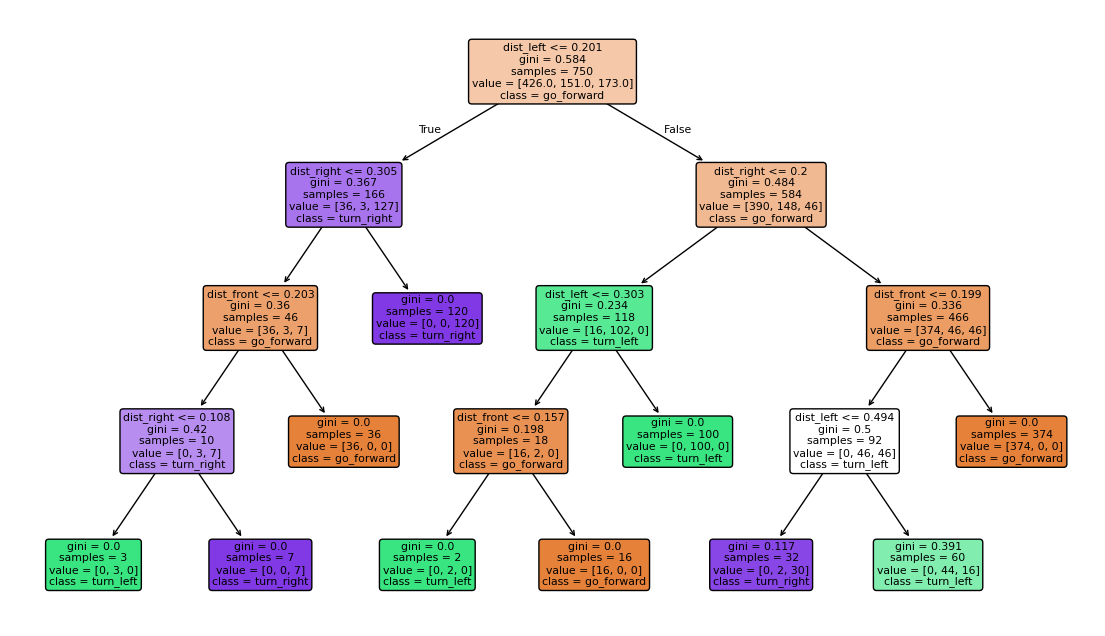

In [ ]:
# Set the figure size for the decision tree plot.
plt.figure(figsize=(14, 8))

# Plot the trained decision tree with feature and class names, filled colors, and rounded nodes.
plot_tree(
    clf,
    feature_names=['dist_left', 'dist_front', 'dist_right'],
    class_names=clf.classes_,
    filled=True,
    rounded=True
)

# Display the decision tree plot.
plt.show()

In [ ]:
# Define a function to predict the action given distances from left, front, and right sensors.
def predict_action(dist_left, dist_front, dist_right):
    # Create a single-sample DataFrame with the same column names used during training.
    sample = pd.DataFrame(
        [[dist_left, dist_front, dist_right]],
        columns=['dist_left', 'dist_front', 'dist_right'])
    pred = clf.predict(sample)[0]  # Predict the action using the trained classifier.
    print(f"\nPredicted Action: {pred}")  # Print the predicted action.

# Test the function with different distance scenarios.
print("=== Predicted Actions ===")
predict_action(0.8, 0.8, 0.8)
predict_action(0.3, 0.1, 0.7)
predict_action(0.1, 0.5, 0.7)
predict_action(0.7, 0.5, 0.1)

=== Predicted Actions ===

Predicted Action: go_forward

Predicted Action: turn_right

Predicted Action: turn_right

Predicted Action: turn_left


In [ ]:
# Create a decision tree classifier with a maximum depth of 6.
six_depth_clf = DecisionTreeClassifier(max_depth=6, random_state=42)

# Train the classifier using the training data.
six_depth_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [ ]:
# Predict the actions for the test set using the depth-6 decision tree.
y_pred = six_depth_clf.predict(x_test)

# Print the accuracy of the depth-6 model on the test data.
print(f"Max Depth 6 Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Print the confusion matrix for the depth-6 model.
print("\n=== Max Depth 6 Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

# Print a detailed classification report for the depth-6 model.
print("\n=== Max Depth 6 Classification Report ===")
print(classification_report(y_test, y_pred))

Max Depth 6 Accuracy: 0.9760

=== Max Depth 6 Confusion Matrix ===
[[142   0   0]
 [  1  48   1]
 [  1   3  54]]

=== Max Depth 6 Classification Report ===
              precision    recall  f1-score   support

  go_forward       0.99      1.00      0.99       142
   turn_left       0.94      0.96      0.95        50
  turn_right       0.98      0.93      0.96        58

    accuracy                           0.98       250
   macro avg       0.97      0.96      0.97       250
weighted avg       0.98      0.98      0.98       250



In [ ]:
# Create a decision tree classifier with a maximum depth of 2.
two_depth_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the classifier using the training data.
two_depth_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
# Predict the actions for the test set using the depth-2 decision tree.
y_pred = two_depth_clf.predict(x_test)

# Print the accuracy of the depth-2 model on the test data.
print(f"Max Depth 2 Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Print the confusion matrix for the depth-2 model.
print("\n=== Max Depth 2 Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

# Print a detailed classification report for the depth-2 model.
print("\n=== Max Depth 2 Classification Report ===")
print(classification_report(y_test, y_pred))

Max Depth 2 Accuracy: 0.8440

=== Max Depth 2 Confusion Matrix ===
[[139   3   0]
 [ 17  33   0]
 [ 19   0  39]]

=== Max Depth 2 Classification Report ===
              precision    recall  f1-score   support

  go_forward       0.79      0.98      0.88       142
   turn_left       0.92      0.66      0.77        50
  turn_right       1.00      0.67      0.80        58

    accuracy                           0.84       250
   macro avg       0.90      0.77      0.82       250
weighted avg       0.87      0.84      0.84       250



In [ ]:
# Import K-Nearest Neighbors classifier from scikit-learn.
from sklearn.neighbors import KNeighborsClassifier

# Test KNN with different numbers of neighbors.
num_neighbors = [1, 3, 9, 15]
print("=== Neighbors Accuracies ===")
for k in num_neighbors:
    # Create a KNN classifier with k neighbors using distance-based weighting.
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance")

    # Train the KNN classifier using the training data.
    knn.fit(x_train, y_train)

    # Predict the actions for the test set and print the accuracy.
    y_pred = knn.predict(x_test)
    print(f"\n{k} Neighbors Accuracy: {accuracy_score(y_test, y_pred):.4f}")

=== Neighbors Accuracies ===

1 Neighbors Accuracy: 0.9040

3 Neighbors Accuracy: 0.9080

9 Neighbors Accuracy: 0.9120

15 Neighbors Accuracy: 0.9080


# **Reinforcement Learning: Making the Decision to Turn Left or Right**

## **1. Basic Scenario (No State Awareness)**
In the simplest case, the agent chooses between two actions — turning left or turning right — without considering any environmental state information. Decisions are purely action-based with no context.

## **2. Scenario With State Information**
Here, the agent receives limited sensor feedback describing how open the space is on each side.
### **State Definitions**
```
state = "left_more_open"   if dist_left  > dist_right + margin
state = "right_more_open"  if dist_right > dist_left + margin
state = "similar"          otherwise
```
* dist_left / dist_right: measured free space on each side
* margin: threshold to avoid treating small differences as meaningful

## **3. Available Actions**
The agent can choose one of two discrete actions:
* **0: turn_left**
* **1: turn_right**

## **4. Reward Structure**
Rewards encourage the agent to choose the safer direction.
* **+1** → The chosen direction has sufficient free space (no collision, safe movement)
* **-1** → A collision occurs or the available space is too small

The reward function is designed to make the agent prefer safer turning decisions over time.

## **5. Goal**
### **Learn a Policy**
A policy maps each state to the action with the highest expected reward. In other words: **For each state, choose the turn that historically results in safer outcomes.**

# **Multi-Armed Bandit Style Approach**

## **Q-Learning Framework**
We use a **Q-table** with dimensions: **number_of_states × 2 (actions)** where each entry **Q[state, action]** estimates the value of taking that action in that state.

## **Q-Learning Update Rule**
Q[s, a] = Q[s, a] + c * (reward + y * max_a' Q[s', a'] - Q[s, a])

**Where:**
* **c**: learning rate
* **r**: reward received
* **γ (gamma)**: discount factor
* **s'**: new state after taking action **a**
* **maxₐ′ Q[s′, a′]**: estimated future value

This update rule gradually improves the agent’s estimate of which action is best in each state.

In [ ]:
import numpy as np

# Set a fixed seed so experiments are reproducible and results remain consistent across runs.
np.random.seed(42)

class TwoArmedBanditEnv:
    """
    A simple two-armed bandit environment.

    Actions:
        0 -> turn_left
        1 -> turn_right

    Rewards:
        +1 for success (based on probability of choosing a good action)
        -1 for failure

    The goal is to simulate environments where each action has a fixed probability
    of providing a positive reward. This allows reinforcement learning algorithms
    to learn which action is generally better over time.
    """

    def __init__(self, p_left=0.7, p_right=0.3):
        """
        Initialize the bandit with given success probabilities.

        Parameters:
            p_left (float): Probability that action 0 gives a +1 reward.
            p_right (float): Probability that action 1 gives a +1 reward.

        We store these probabilities in a dictionary for easier access during steps.
        """
        self.p = {0: p_left, 1: p_right}

    def step(self, action):
        """
        Execute one step in the environment using the chosen action.

        Parameters:
            action (int): The selected action (0 for left, 1 for right).

        Returns:
            reward (int): +1 if the randomized outcome is successful,
                          -1 otherwise.

        The reward is generated via a Bernoulli trial using the action's probability.
        """
        # Ensure the action is valid before proceeding.
        assert action in [0, 1], "Action must be 0 (left) or 1 (right)."

        # Retrieve the probability of success for the selected action.
        prob = self.p[action]

        # Generate a reward according to the probability.
        # If random number < prob, the agent receives +1, otherwise −1.
        reward = 1 if np.random.rand() < prob else -1

        return reward